# Prosper Loan Data Visualization

## Preliminary Wrangling

This document explores a dataset containing 113,937 loans and 81 variables such as Term, BorrowerRate, EmploymentStatus, etc.

In [1]:
import pandas as pd
import numpy as np
import datetime
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

In [2]:
loan_data = pd.read_csv('prosperLoanData.csv')

In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
loan_data.head(5)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B  193129         2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1  1209647        2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A  81716          2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A  658116         2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2  909464         2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0  C           36    Completed  2009-08-14 00:00:00  0.16516       
1  NaN         36    Current    NaN                  0.12016       
2  HR          36    Completed  2009-12-17 00:00:00  0.28269       
3  NaN         36    Current    NaN                  0.12528       
4  NaN         36    Current    NaN                  0.24614       

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0  0.1580        0.1380      NaN                      NaN              
1  0.0920        0.0820       0.07960                  0.0249          
2  0.2750        0.2400      NaN                      NaN              
3  0.0974        0.0874       0.08490                  0.0249          
4  0.2085        0.1985       0.18316                  0.0925          

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0 NaN              NaN                       NaN                    
1  0.05470          6.0                      A                      
2 NaN              NaN                       NaN                    
3  0.06000          6.0                      A                      
4  0.09066          3.0                      D                      

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0 NaN            0                          CO            Other           
1  7.0           2                          CO            Professional    
2 NaN            0                          GA            Other           
3  9.0           16                         GA            Skilled Labor   
4  4.0           2                          MN            Executive       

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0  Self-employed    2.0                       True                  
1  Employed         44.0                      False                 
2  Not available   NaN                        False                 
3  Employed         113.0                     True                  
4  Employed         44.0                      True                  

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0  True              NaN                      2007-08-26 18:41:46.780000000   
1  False             NaN                      2014-02-27 08:28:14             
2  True              783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3  False             NaN                      2012-10-22 11:02:32             
4  False             NaN                      2013-09-14 18:38:44             

   CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
0  640.0                  659.0                  2001-10-11 00:00:00      
1  680.0                  699.0                  1996-03-18 00:00:00      
2  480.0                  499.0                  2002-07-27 00:00:00      
3  800.0                  819.0                  1983-02-28 00:00:00      
4  680.0                  699.0                  2004-02-20 00:00:00      

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0  5.0                 4.0              12.0                         
1  14.0                14.0             29.0                         
2 NaN                 NaN               3.0                          
3  5.0                 5.0              29.0                         
4  19.0                19.0             49.0                         

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0  1      

Clean the dataset and only keep variables that are of interest for visualization and to answer research questions.

In [5]:
prosperLoanData = loan_data[['Term','BorrowerRate','ListingCreationDate','EmploymentStatus','EmploymentStatusDuration',
                            'ListingCategory (numeric)','StatedMonthlyIncome','AvailableBankcardCredit','LoanOriginalAmount',
                            'Occupation','ProsperRating (Alpha)','LoanStatus','BorrowerAPR']]

In [6]:
prosperLoanData.head()

Term  BorrowerRate            ListingCreationDate EmploymentStatus  \
0  36    0.1580        2007-08-26 19:09:29.263000000  Self-employed     
1  36    0.0920        2014-02-27 08:28:07.900000000  Employed          
2  36    0.2750        2007-01-05 15:00:47.090000000  Not available     
3  36    0.0974        2012-10-22 11:02:35.010000000  Employed          
4  36    0.2085        2013-09-14 18:38:39.097000000  Employed          

   EmploymentStatusDuration  ListingCategory (numeric)  StatedMonthlyIncome  \
0  2.0                       0                          3083.333333           
1  44.0                      2                          6125.000000           
2 NaN                        0                          2083.333333           
3  113.0                     16                         2875.000000           
4  44.0                      2                          9583.333333           

   AvailableBankcardCredit  LoanOriginalAmount     Occupation  \
0  1500.0                   9425                Other           
1  10266.0                  10000               Professional    
2 NaN                       3001                Other           
3  30754.0                  10000               Skilled Labor   
4  695.0                    15000               Executive       

  ProsperRating (Alpha) LoanStatus  BorrowerAPR  
0  NaN                   Completed  0.16516      
1  A                     Current    0.12016      
2  NaN                   Completed  0.28269      
3  A                     Current    0.12528      
4  D                     Current    0.24614

In [7]:
prosperLoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
Term                         113937 non-null int64
BorrowerRate                 113937 non-null float64
ListingCreationDate          113937 non-null object
EmploymentStatus             111682 non-null object
EmploymentStatusDuration     106312 non-null float64
ListingCategory (numeric)    113937 non-null int64
StatedMonthlyIncome          113937 non-null float64
AvailableBankcardCredit      106393 non-null float64
LoanOriginalAmount           113937 non-null int64
Occupation                   110349 non-null object
ProsperRating (Alpha)        84853 non-null object
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
dtypes: float64(5), int64(3), object(5)
memory usage: 11.3+ MB


In [8]:
prosperLoanData.describe()

Term   BorrowerRate  EmploymentStatusDuration  \
count  113937.000000  113937.000000  106312.000000              
mean   40.830248      0.192764       96.071582                  
std    10.436212      0.074818       94.480605                  
min    12.000000      0.000000       0.000000                   
25%    36.000000      0.134000       26.000000                  
50%    36.000000      0.184000       67.000000                  
75%    36.000000      0.250000       137.000000                 
max    60.000000      0.497500       755.000000                 

       ListingCategory (numeric)  StatedMonthlyIncome  \
count  113937.000000              1.139370e+05          
mean   2.774209                   5.608026e+03          
std    3.996797                   7.478497e+03          
min    0.000000                   0.000000e+00          
25%    1.000000                   3.200333e+03          
50%    1.000000                   4.666667e+03          
75%    3.000000                   6.825000e+03          
max    20.000000                  1.750003e+06          

       AvailableBankcardCredit  LoanOriginalAmount    BorrowerAPR  
count  106393.000000            113937.00000        113912.000000  
mean   11210.225447             8337.01385          0.218828       
std    19818.361309             6245.80058          0.080364       
min    0.000000                 1000.00000          0.006530       
25%    880.000000               4000.00000          0.156290       
50%    4100.000000              6500.00000          0.209760       
75%    13180.000000             12000.00000         0.283810       
max    646285.000000            35000.00000         0.512290

### What is the structure of your dataset?

There are 113,937 loans available in the dataset and for this project I have shortlisted 16 features namely: 
Term, BorrowerRate, EmploymentStatus, EmploymentStatusDuration, CreditScoreRangeLower, CreditScoreRangeUpper, OpenRevolvingAccounts, TotalInquiries, CurrentDelinquencies, IncomeRange, StatedMonthlyIncome, LoanOriginalAmount, Occupation, LoanStatus, ListingCategory and BorrowerAPR.

Apart from EmploymentStatus and IncomeRange, rest of the variables are numeric in nature. 

### What is/are the main feature(s) of interest in your dataset?

I am more interested in figuring out what features impact the Borrower's APR. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that the loan term, EmploymentStatus, Occupation, LoanOriginalAmount,StatedMonthlyIncome will have effects on APR. 

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: BorrowerAPR.

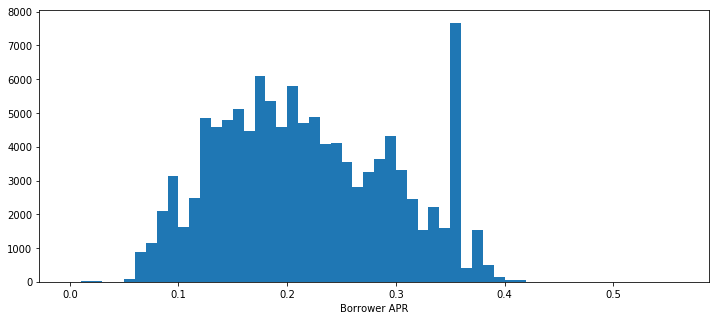

In [9]:
binsize = 0.05
bins = np.arange(0, prosperLoanData['BorrowerAPR'].max()+binsize, 0.01)

plt.figure(figsize=[12, 5])
plt.hist(data = prosperLoanData, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.show()

This distribution seems to have multiple peaks with a sharp peak between 0.35 and 0.36. There are not many loans with APR greater than 0.42. 

In [10]:
#Analyzing rows that have a value of APR greater than 0.42
highAPRData = prosperLoanData[prosperLoanData['BorrowerAPR'] > 0.42]
highAPRData

Term  BorrowerRate            ListingCreationDate EmploymentStatus  \
18326   36    0.4500        2006-03-11 15:43:45.393000000  NaN               
22195   36    0.4500        2006-03-12 13:44:15.060000000  NaN               
36018   36    0.4975        2006-02-23 13:57:02.087000000  NaN               
56761   36    0.4975        2006-03-16 19:30:16.753000000  NaN               
82043   36    0.4800        2006-03-02 19:00:17.593000000  NaN               
103973  36    0.4500        2006-03-06 22:36:53.753000000  NaN               
105889  36    0.3600        2010-10-22 14:07:40.683000000  Employed          

        EmploymentStatusDuration  ListingCategory (numeric)  \
18326  NaN                        0                           
22195  NaN                        0                           
36018  NaN                        0                           
56761  NaN                        0                           
82043  NaN                        0                           
103973 NaN                        0                           
105889  36.0                      7                           

        StatedMonthlyIncome  AvailableBankcardCredit  LoanOriginalAmount  \
18326   10000.000000        NaN                       3000                 
22195   2916.666667         NaN                       1789                 
36018   2838.000000         NaN                       1500                 
56761   0.000000            NaN                       3000                 
82043   1583.333333         NaN                       3000                 
103973  3750.000000         NaN                       2800                 
105889  2250.000000          847.0                    1000                 

                      Occupation ProsperRating (Alpha)  LoanStatus  \
18326   NaN                       NaN                   Defaulted    
22195   NaN                       NaN                   Chargedoff   
36018   NaN                       NaN                   Completed    
56761   NaN                       NaN                   Defaulted    
82043   NaN                       NaN                   Defaulted    
103973  NaN                       NaN                   Defaulted    
105889  Administrative Assistant  HR                    Chargedoff   

        BorrowerAPR  
18326   0.45857      
22195   0.46201      
36018   0.51229      
56761   0.50633      
82043   0.48873      
103973  0.45857      
105889  0.42395

It can be seen that for rows where borrower's APR was greater than 0.42 a lot of the information is missing such as IncomeRange. However, LoanOriginalAmount value is very small. This means the original loan amount value has an impact on the borrower's APR.

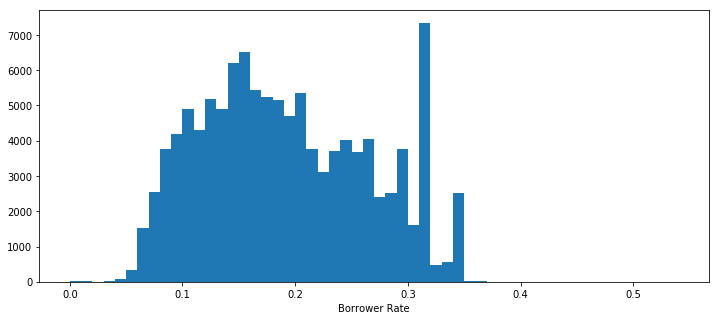

In [11]:
binsize = 0.05
bins = np.arange(0, prosperLoanData['BorrowerRate'].max()+binsize, 0.01)

plt.figure(figsize=[12, 5])
plt.hist(data = prosperLoanData, x = 'BorrowerRate', bins = bins)
plt.xlabel('Borrower Rate')
plt.show()

The distribution for Borrower's interest rate is similar to that of Borrower's APR with a sharp peak between 0.31 and 0.32. This is a multi modal distribution. 

In [12]:
#Creating a subset where Borrower's APR is not null as we are trying to analyze the impact of other features on
#this dependant variable. 
prosperLoans = prosperLoanData[prosperLoanData['BorrowerAPR'].notna()]

In [13]:
prosperLoans = prosperLoans.reset_index()

In [14]:
prosperLoans.shape

(113912, 14)

In [15]:
prosperLoans.describe()

index           Term   BorrowerRate  EmploymentStatusDuration  \
count  113912.000000  113912.000000  113912.000000  106312.000000              
mean   56964.779479   40.831308      0.192786       96.071582                  
std    32890.286245   10.437112      0.074809       94.480605                  
min    0.000000       12.000000      0.000000       0.000000                   
25%    28481.750000   36.000000      0.134000       26.000000                  
50%    56962.500000   36.000000      0.184000       67.000000                  
75%    85449.250000   36.000000      0.250000       137.000000                 
max    113936.000000  60.000000      0.497500       755.000000                 

       ListingCategory (numeric)  StatedMonthlyIncome  \
count  113912.000000              1.139120e+05          
mean   2.774817                   5.606973e+03          
std    3.997024                   7.478338e+03          
min    0.000000                   0.000000e+00          
25%    1.000000                   3.200000e+03          
50%    1.000000                   4.666667e+03          
75%    3.000000                   6.817083e+03          
max    20.000000                  1.750003e+06          

       AvailableBankcardCredit  LoanOriginalAmount    BorrowerAPR  
count  106393.000000            113912.000000       113912.000000  
mean   11210.225447             8338.015661         0.218828       
std    19818.361309             6245.940592         0.080364       
min    0.000000                 1000.000000         0.006530       
25%    880.000000               4000.000000         0.156290       
50%    4100.000000              6500.000000         0.209760       
75%    13180.000000             12000.000000        0.283810       
max    646285.000000            35000.000000        0.512290

In [16]:
prosperLoans['StatedMonthlyIncome'] = prosperLoans['StatedMonthlyIncome'].astype('int')

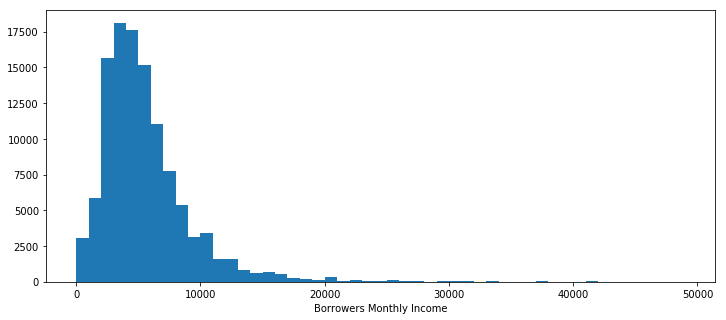

In [17]:
binsize = 1000
bins = np.arange(0, 50000, 1000)

plt.figure(figsize=[12, 5])
plt.hist(data = prosperLoans, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Borrowers Monthly Income')
plt.show()

In [18]:
highermonthlyincomedata = prosperLoans[prosperLoans['StatedMonthlyIncome'] > 30000]
highermonthlyincomedata.shape

(327, 14)

In [19]:
highermonthlyincomedata.head(10)

index  Term  BorrowerRate            ListingCreationDate  \
196   196    60    0.1346        2012-10-18 14:53:24.960000000   
224   224    36    0.1099        2014-01-10 07:24:44.853000000   
307   307    36    0.1239        2013-12-10 08:27:57.030000000   
521   521    36    0.1670        2007-11-14 19:33:38.060000000   
637   637    36    0.1559        2013-05-23 09:31:31.077000000   
667   667    36    0.1445        2007-05-24 22:46:07.290000000   
1003  1003   36    0.1099        2013-09-06 13:27:12.037000000   
1137  1137   36    0.3177        2012-11-02 13:52:46.923000000   
1171  1171   60    0.2433        2012-07-23 23:14:06.177000000   
1304  1304   36    0.1799        2011-09-08 19:32:59.997000000   

     EmploymentStatus  EmploymentStatusDuration  ListingCategory (numeric)  \
196   Employed         89.0                      19                          
224   Employed         114.0                     1                           
307   Self-employed    26.0                      1                           
521   Full-time        162.0                     0                           
637   Employed         20.0                      2                           
667   Full-time        71.0                      0                           
1003  Self-employed    337.0                     2                           
1137  Employed         139.0                     2                           
1171  Employed         87.0                      1                           
1304  Employed         109.0                     1                           

      StatedMonthlyIncome  AvailableBankcardCredit  LoanOriginalAmount  \
196   33333                40956.0                  25000                
224   33333                103931.0                 30000                
307   40000                24316.0                  15000                
521   30166                10980.0                  5000                 
637   31666                14342.0                  35000                
667   31666                63582.0                  25000                
1003  41666                26457.0                  4000                 
1137  37500                1949.0                   4000                 
1171  34813                95.0                     25000                
1304  31250                10225.0                  10000                

              Occupation ProsperRating (Alpha)  LoanStatus  BorrowerAPR  
196   Other               A                     Current     0.15752      
224   Sales - Commission  A                     Current     0.13799      
307   Professional        A                     Current     0.15223      
521   Doctor              NaN                   Completed   0.17420      
637   Doctor              B                     Current     0.19236      
667   Realtor             NaN                   Chargedoff  0.15161      
1003  Construction        A                     Current     0.13799      
1137  Executive           HR                    Completed   0.35797      
1171  Doctor              C                     Chargedoff  0.26887      
1304  Other               B                     Completed   0.20200

In [20]:
#Calculating proportion of borrowers with monthly income greater than 30000
prop_higherincome = highermonthlyincomedata.shape[0]/prosperLoans.shape[0]
prop_higherincome

0.0028706369829341947

Out of the 113,912 rows there are about 327 rows where the monthly income is greater than 30,000. 
0.002 is a very small proportion and is a negligible amount. 
It is safe to eliminate these outliers from the dataset. 

The distribution is unimodal and right skewed. The histogram peaks at 4000 - 5000. 
Not many borrowers have a monthly income greater than 30000. 

In [21]:
prosperLoans = prosperLoanData[prosperLoanData['StatedMonthlyIncome'] <= 30000]

In [22]:
prosperLoans = prosperLoans.reset_index()

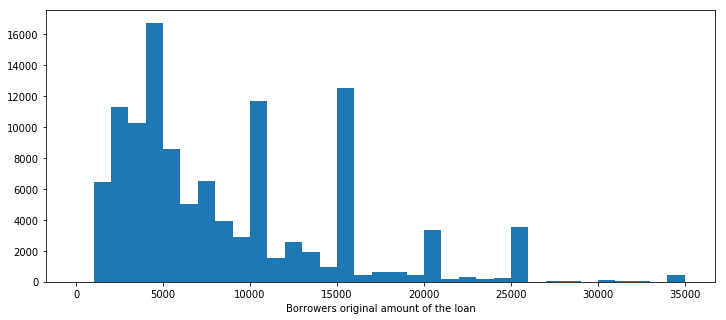

In [23]:
binsize = 1000
bins = np.arange(0, prosperLoans['LoanOriginalAmount'].max() + binsize, 1000)

plt.figure(figsize=[12, 5])
plt.hist(data = prosperLoans, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Borrowers original amount of the loan')
plt.show()

Around 16,000 borrowers have taken a loan amount in the range of 5000 - 6000. There are a few peaks at 10K, 15K, 20K and 25K. Maximum amount of loan taken is 35000. 

In [24]:
#Check for null values in EmploymentStatus column and rename those as Not available
prosperLoans['EmploymentStatus'].fillna("Not available", inplace = True) 

[Text(0,0,'Employed'),
 Text(0,0,'Full-time'),
 Text(0,0,'Not available'),
 Text(0,0,'Self-employed'),
 Text(0,0,'Other'),
 Text(0,0,'Part-time'),
 Text(0,0,'Not employed'),
 Text(0,0,'Retired')]

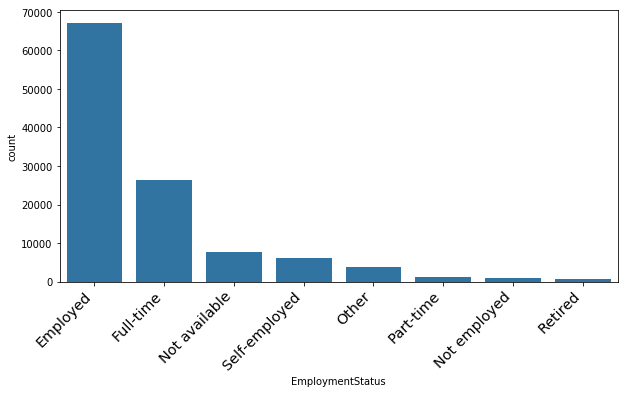

In [25]:
#Bar chart of EmploymentStatus
plt.figure(figsize=(10,5))
base_color = sn.color_palette()[0]
cat_order = prosperLoans['EmploymentStatus'].value_counts().index
chart = sn.countplot(data = prosperLoans, x = 'EmploymentStatus', color = base_color, order = cat_order)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')

It can be seen that maximum number of borrowers (~ 68,000) are employed. There are about 25,000 borrowers who are employed full-time while the least number of borrowers are retired. It would be interesting to see of the employment status has any effect on APR. 

[Text(0,0,'36'), Text(0,0,'60'), Text(0,0,'12')]

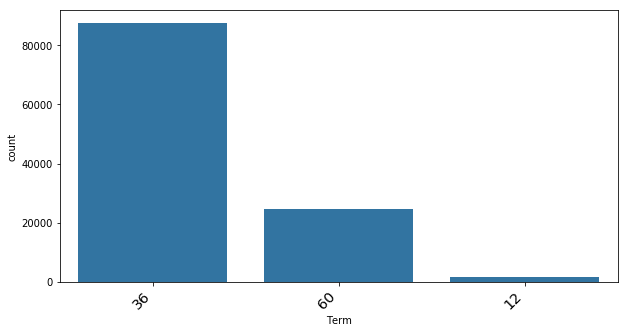

In [26]:
#Bar chart of loan Term
plt.figure(figsize=(10,5))
base_color = sn.color_palette()[0]
cat_order = prosperLoans['Term'].value_counts().index
chart = sn.countplot(data = prosperLoans, x = 'Term', color = base_color, order = cat_order)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')

It is interesting to learn that maximum borrowers (~95,000) took a loan of 36 months term while 20,000 borrowers took a loan of 60 months. 

In [27]:
#Plot a bar chart of number of loans by year
prosperLoans['ListingCreationDate'] = pd.to_datetime(prosperLoans['ListingCreationDate'])

In [28]:
prosperLoans['ListingCreationYear'] = pd.DatetimeIndex(prosperLoans['ListingCreationDate']).year
prosperLoans.head()

index  Term  BorrowerRate     ListingCreationDate EmploymentStatus  \
0  0      36    0.1580       2007-08-26 19:09:29.263  Self-employed     
1  1      36    0.0920       2014-02-27 08:28:07.900  Employed          
2  2      36    0.2750       2007-01-05 15:00:47.090  Not available     
3  3      36    0.0974       2012-10-22 11:02:35.010  Employed          
4  4      36    0.2085       2013-09-14 18:38:39.097  Employed          

   EmploymentStatusDuration  ListingCategory (numeric)  StatedMonthlyIncome  \
0  2.0                       0                          3083.333333           
1  44.0                      2                          6125.000000           
2 NaN                        0                          2083.333333           
3  113.0                     16                         2875.000000           
4  44.0                      2                          9583.333333           

   AvailableBankcardCredit  LoanOriginalAmount     Occupation  \
0  1500.0                   9425                Other           
1  10266.0                  10000               Professional    
2 NaN                       3001                Other           
3  30754.0                  10000               Skilled Labor   
4  695.0                    15000               Executive       

  ProsperRating (Alpha) LoanStatus  BorrowerAPR  ListingCreationYear  
0  NaN                   Completed  0.16516      2007                 
1  A                     Current    0.12016      2014                 
2  NaN                   Completed  0.28269      2007                 
3  A                     Current    0.12528      2012                 
4  D                     Current    0.24614      2013

In [29]:
prosperLoans.groupby('ListingCreationYear').size()

ListingCreationYear
2005    23   
2006    6193 
2007    11525
2008    11237
2009    2203 
2010    5516 
2011    11404
2012    19494
2013    35310
2014    10705
dtype: int64

[Text(0,0,'2005'),
 Text(0,0,'2006'),
 Text(0,0,'2007'),
 Text(0,0,'2008'),
 Text(0,0,'2009'),
 Text(0,0,'2010'),
 Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014')]

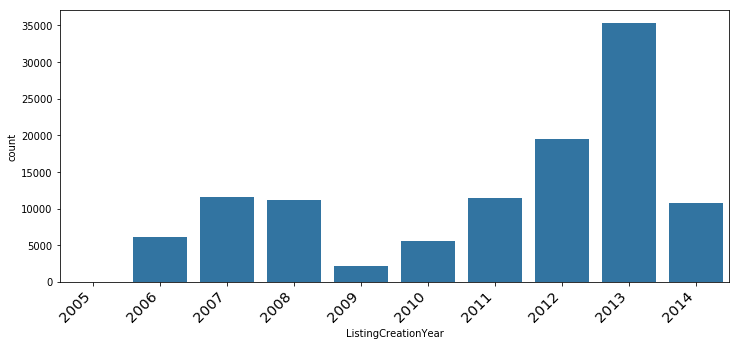

In [30]:
#Bar chart of number of loans borrowed by year
plt.figure(figsize=(12,5))
base_color = sn.color_palette()[0]
chart = sn.countplot(data = prosperLoans, x = 'ListingCreationYear', color = base_color)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')

It can be seen that maximum loans were taken in the year 2013. 

## Univariate Analysis

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Borrower's APR and Interest rate are unimodal and similar in nature. Most of the values for APR were between 0.05 and 0.42. Borrower's monthly income is unimodal in nature and right skewed. No transformations were needed for any of the univariate charts. Borrower's original amount of the loan had a peak at 5000 and some peaks at 10K, 15K, 20K.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Distribution of Borrower's APR is unimodal. However, there were some rows where APR is a null value or the value is missing. Since this is the main variable of interest, we have eliminated rows where the APR is a null value.  

The distribution for borrower's stated monthly income is clearly unimodal.However, there were values where the borrower earns more than 30,000 per month and have taken a loan amount less than their monthly income. This seemed more like outliers to me and hence have eliminated them from the dataset for further analysis. 

For the last plot i.e. bar chart of number of loans taken by year, I converted the ListingCreationDate column to a datetime type and then created a new column in the prosperloans dataframe called as ListingCreationYear. This new column just stores the year value from the ListingCreationDate column. 


## Bivariate Exploration

In [31]:
prosperLoans = prosperLoans[~prosperLoans['AvailableBankcardCredit'].isna()]

In [32]:
numeric_vars = ['Term', 'BorrowerRate', 'StatedMonthlyIncome', 'LoanOriginalAmount','BorrowerAPR']
categoric_vars = ['EmploymentStatus', 'IncomeRange']

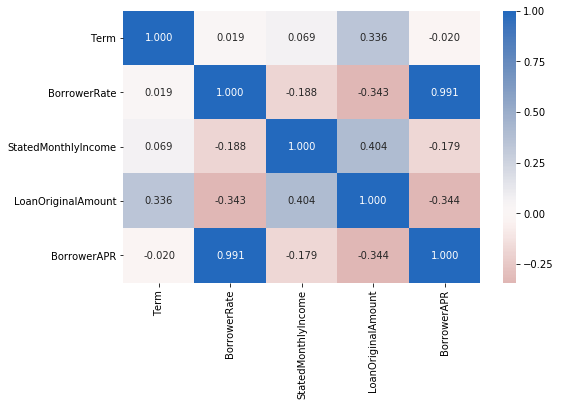

In [33]:
plt.figure(figsize = [8, 5])
sn.heatmap(prosperLoans[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

It can be seen from the above heatmap that monthly income and borrower's interest rate are negatively correlated with a value of -0.329. It can also be seen that loan original amount is negatively correlated with Borrower's APR. Thus we can say that borrowers who loan for large amounts will be receiving smaller APR and interest rate. 

It can also be seen that monthly income of the borrower is positively correlated with the loan original amount. The highest positive correlation is between borrower's interest rate and borrower's APR which makes sense as APR is nothing but interest rate plus fees. 

/Users/sherylmathias/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


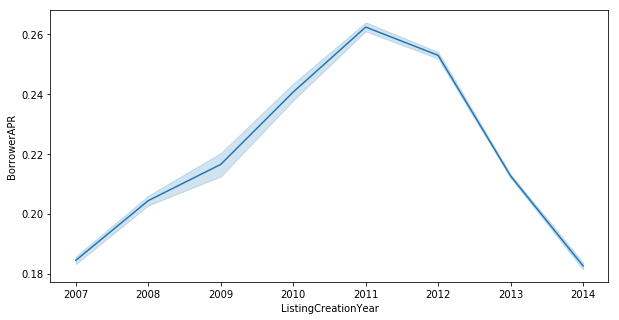

In [34]:
#LineChart of Borrower's APR versus year
plt.figure(figsize = [10, 5])
sn.lineplot(data=prosperLoans, x="ListingCreationYear", y="BorrowerAPR")

We can also see from the above line chart how APR has changed over the years. In 2011 we had the highest APR (0.26) which decreased the most in 2014. 

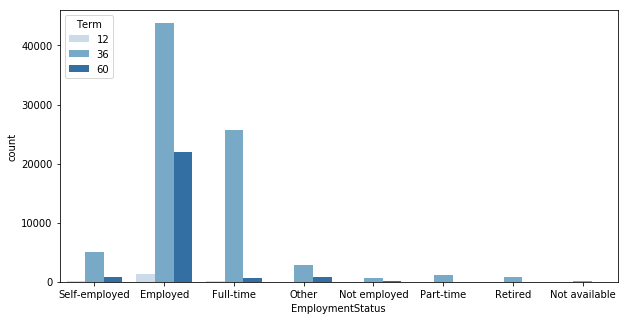

In [35]:
plt.figure(figsize = [10, 5])

#Employment Status vs term
sn.countplot(data = prosperLoans, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')

The above clustered bar chart shows that maximum number of borrowers were employed and had taken 36 month term loan, followed by those with employment status as full time. In every category, it can be observed that 36 month term loan is more common. 
Most frequently used term for loans borrowed was 36 months by employed and full time borrowers. 

/Users/sherylmathias/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


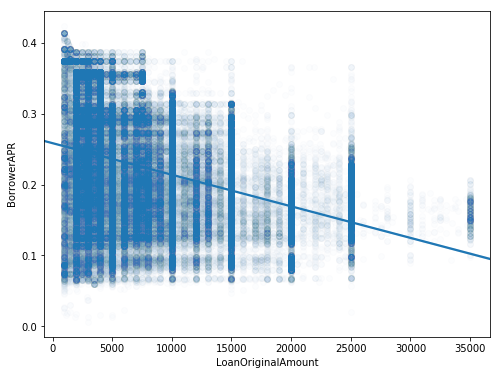

In [36]:
plt.figure(figsize = [8, 6])
sn.regplot(data = prosperLoans, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});

It can be seen that the range of APR is wider for small amounts of loan. This range becomes smaller and the APR reduces with large amounts of loan amount. Thus it can be seen that loan original amount is negatively correlated to Borrower's APR. 

In [37]:
#Getting all values for Prosper Ratings
prosperLoans.groupby('ProsperRating (Alpha)').size()

ProsperRating (Alpha)
A     14492
AA    5350 
B     15514
C     18291
D     14254
E     9785 
HR    6918 
dtype: int64

In [38]:
#Converting this categorical value into ordinal type
ordinal_var_dict = {'ProsperRating (Alpha)': ['AA','A','B','C','D','E','HR']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    prosperLoans[var] = prosperLoans[var].astype(ordered_var)

/Users/sherylmathias/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

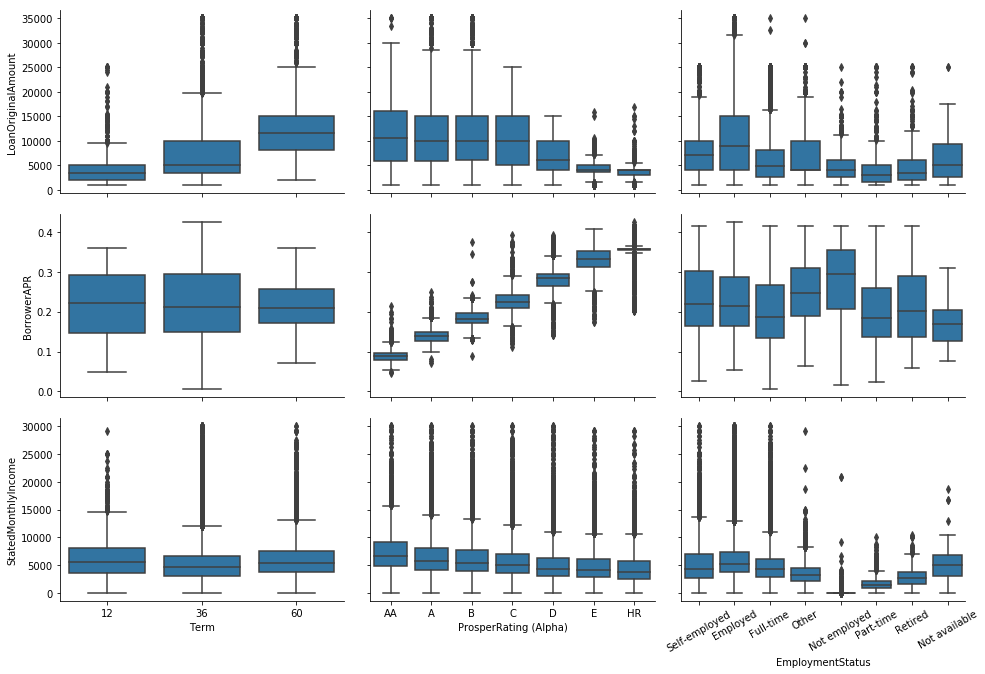

In [39]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sn.color_palette()[0]
    sn.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sn.PairGrid(data = prosperLoans, y_vars = ['LoanOriginalAmount', 'BorrowerAPR','StatedMonthlyIncome'], 
                x_vars = ['Term','ProsperRating (Alpha)','EmploymentStatus'],
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation=30);
plt.show();

The above grid of Box plots explains the different relationships between categorical and numeric variables. 
1. There seems to be a relationship between Loan original amount and term. Borrowers lending a large loan amount seem to take a long loan term. 
2. Borrower's APR is higher for those rated lowest by Prosper Loans. (HR) Prosper Loan Rating has an impact on Borrower's APR. 
3. Self-employed, employed and full time employed borrowers have a higher monthly income compared to others. 

## Bivariate Analysis


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Performed bivariate analysis with different variables from the ProsperLoans dataset. BorrowerAPR is the main feature of interest. 
1. From the heat map it can be seen that the highest positive correlation is between borrower's interest rate and borrower's APR which makes sense as APR is nothing but interest rate plus fees. 
2. It can also be seen that loan original amount is negatively correlated with Borrower's APR. Thus we can say that borrowers who loan for large amounts will be receiving smaller APR. It can be seen that the range of APR is wider for small amounts of loan in the scatter plot. This range becomes smaller and the APR reduces with large amounts of loan amount.
3. Lastly, Borrower's APR is higher for those rated lowest by Prosper Loans. (HR) Prosper Loan Rating has an impact on Borrower's APR. 

Thus overall I can say that loan original amount and ProsperLoanRating do have an impact on Borrower's APR and are features that can help predict a Borrower's APR.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

For non-main features of interest there were some interesting relationships that could be observed from the above visualizations. 
1. From the heat map it can also be seen that the monthly income of the borrower is positively correlated with the loan original amount. 
2. The highest positive correlation is between borrower's interest rate and borrower's APR which makes sense as APR is nothing but interest rate plus fees. 
3. The clustered bar chart shows that maximum number of borrowers were employed and had taken 36 month term loan.
4. Most frequently used term for loans borrowed was 36 months by employed and full time borrowers followed by self employed borrowers.
5. From the scatter plot, it can be seen that the range of APR is wider for small amounts of loan. This range becomes smaller and the APR reduces with large amounts of loan amount. Thus it can be seen that loan original amount is negatively correlated to Borrower's APR.
6. There seems to be a relationship between Loan original amount and term in the box plot. Borrowers lending a large loan amount seem to take a longer loan term.
7. Self-employed, employed and full time employed borrowers have a higher monthly income compared to others. 

## Multivariate Emploration

/Users/sherylmathias/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


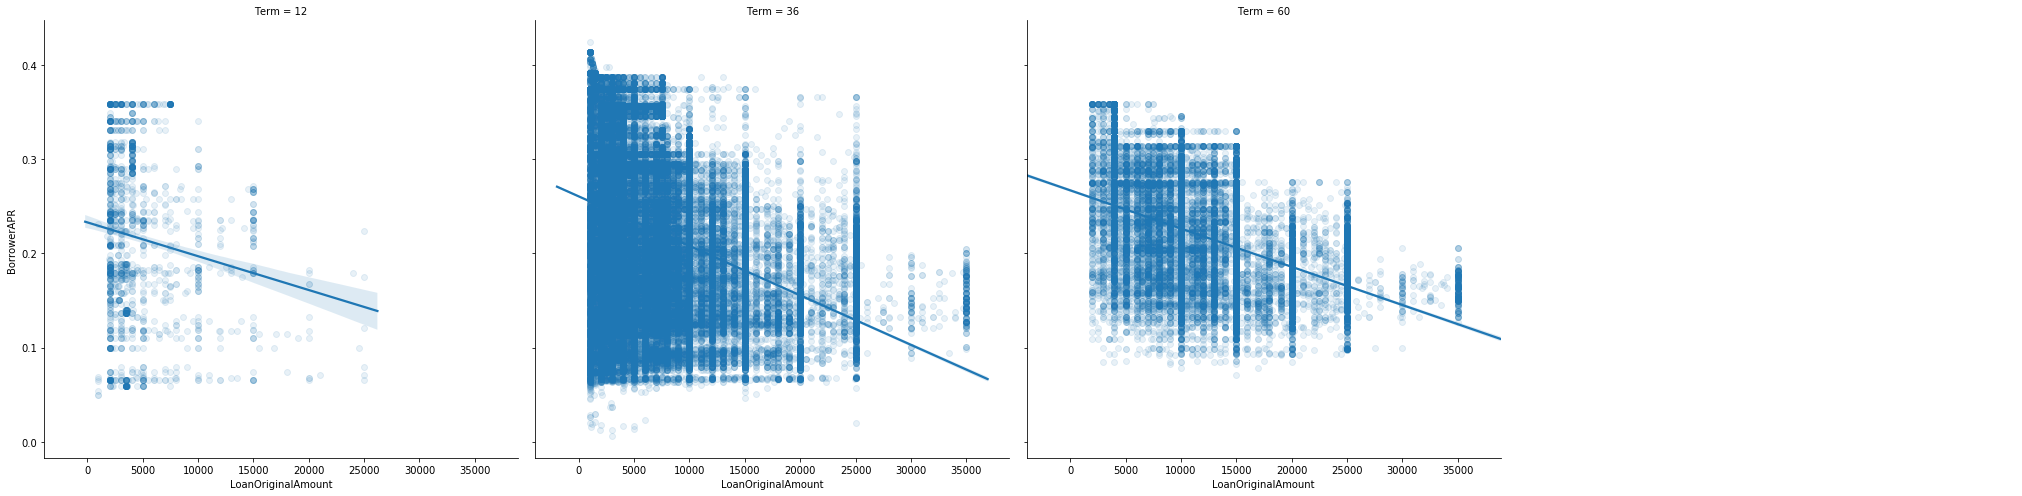

In [51]:
g=sn.FacetGrid(data=prosperLoans, aspect=1.0, height=7, col='Term', col_wrap=4)
g.map(sn.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':0.1});
g.add_legend();

It can be seen from the above multivariate scatter plot that maximum borrowers took a loan for the term of 36 months. The scatter plot is pretty dense compared to other plots.
The range of Borrower's APR for the term 36 months is the broadest compared to other loan terms and most of the loan's original amount is between 0 to 10K. We can also see that with larger amounts of the loan, the range of borrower's APR decreases across all loan terms. 

/Users/sherylmathias/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


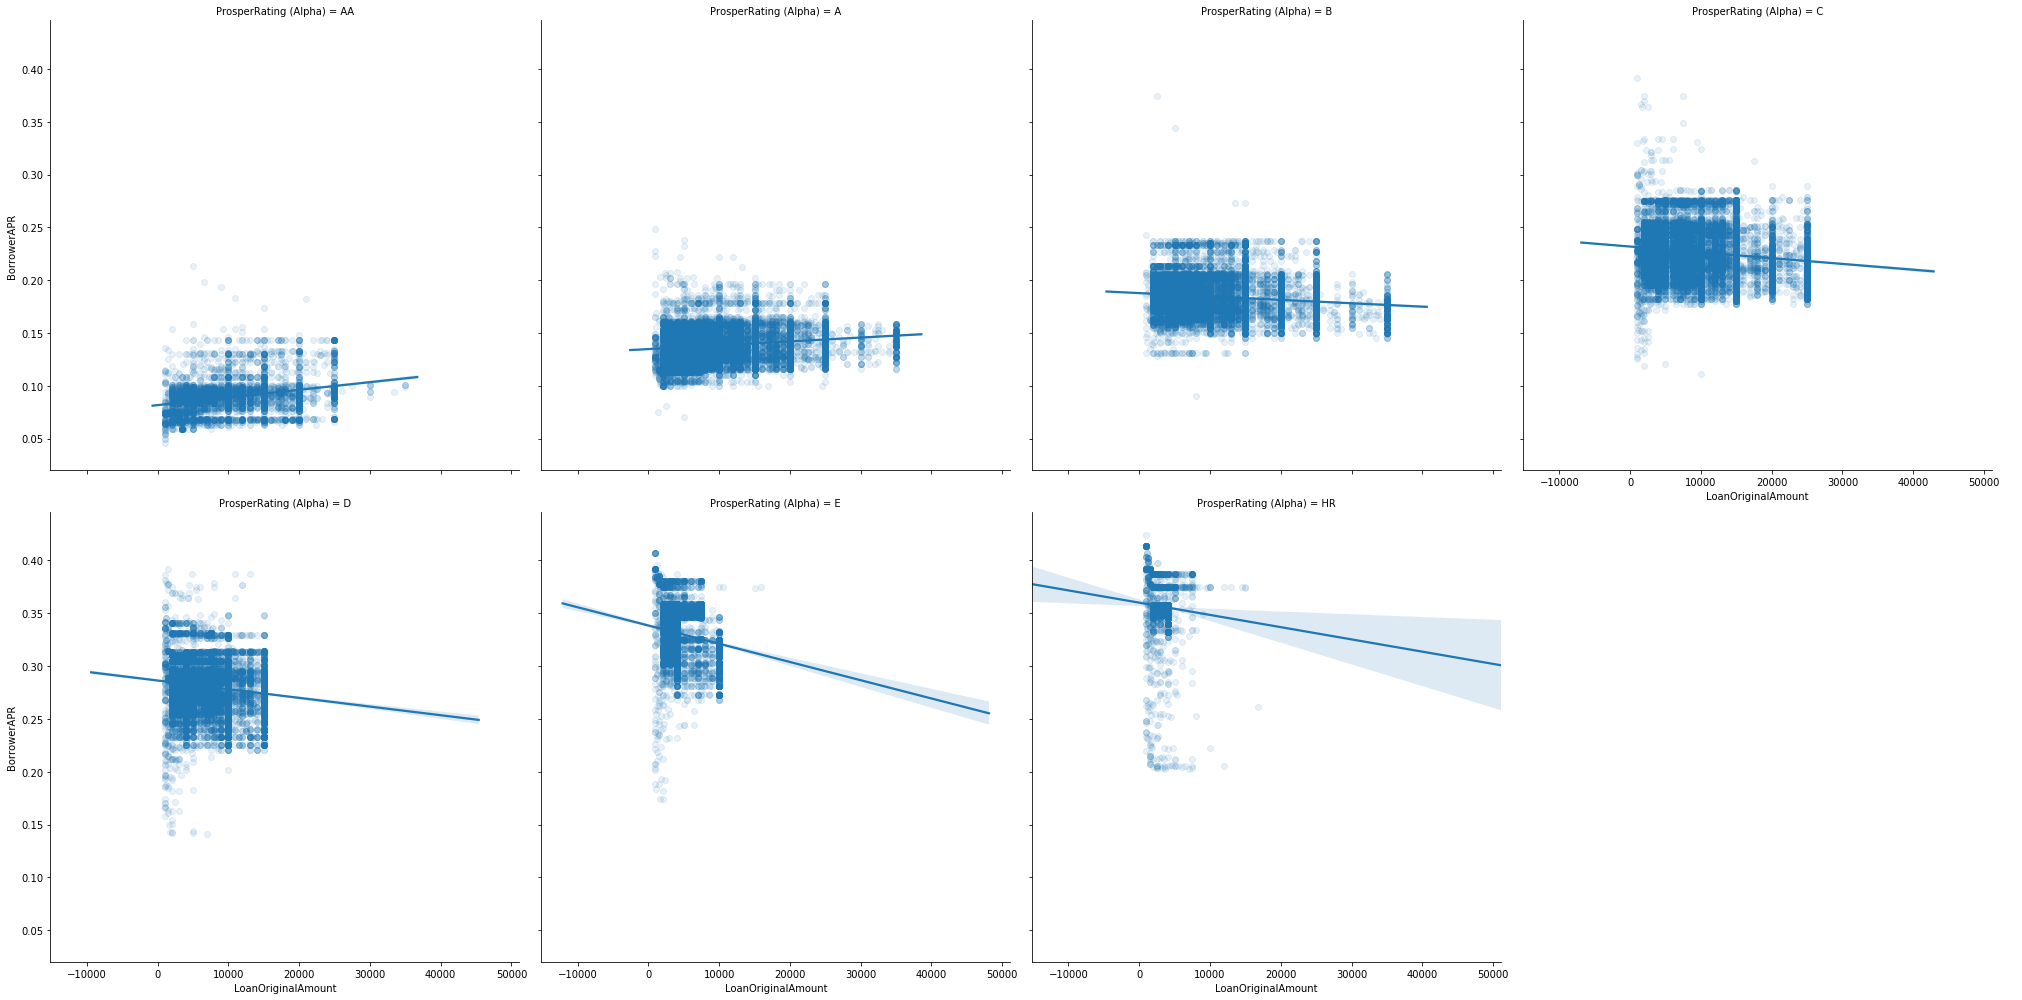

In [58]:
g=sn.FacetGrid(data=prosperLoans, aspect=1.0, height=7, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sn.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':0.1});
g.add_legend();

The above is a scatter plot that visualizes borrower's APR versus loan's original amount across various Prosper Loan's rating system. 
It is interesting to see that the lowest borrower's APR is for those borrower's rated in the AA category. This keeps increasing as we go through all rating categories. The borrower's APR is the highest for categories D, E and HR. 

It is also interesting to see that very borrowers fall in category HR. Maximum borrowers fall in the category A, B, C and D. At the same time as we go through plots for Prosper Rating A, B, C and D, the range of borrower's APR keeps increasing with the maximum range for borrowers categorized with rating HR. The smallest range is for those borrowers categorized in rating AA.

## Multivariate Analysis

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
1. LoanOriginalAmount is an important factor that can predict a borrower's APR. 
2. ProsperRating is also an important factor that can predict a borrower's APR. 


### Were there any interesting or surprising interactions between features?
1. I noticed that the range of borrower's APR grows larger as the ratings decrease. Also the range of loan original amount is the highest for those rated in A, B and C.
2. Maximum borrowers prefer a loan term of 36 months followed by 60 months. 
3. The more a borrower borrows, the lesser the APR. 